In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rv_histogram

from tqdm.notebook import tqdm


In [28]:

data_path = "../data/data_econ.csv"
df = pd.read_csv(data_path)

treatment = df.loc[df.treatment == 1]
control = df.loc[df.treatment == 0]

# printb basics about the dataframe
print(df.keys())
print(df.shape)

print("Number of treatment: {}".format(len(treatment)))
print("Number of control: {}".format(len(control)))

Index(['amount', 'freq', 'HPA', 'ask1', 'ask2', 'ask3', 'control', 'treatment',
       'ask', 'ratio', 'size', 'gave', 'sizeno', 'years', 'couple', 'female',
       'redcty', 'bluecty', 'askd1', 'askd2', 'askd3', 'cases', 'nonlit',
       'ratio2', 'ratio3', 'size25', 'size50', 'size100', 'MRM2', 'dormant',
       'ltmedMRA', 'red0', 'blue0', 'close25', 'amountchange'],
      dtype='object')
(50083, 35)
Number of treatment: 33396
Number of control: 16687


In [29]:
treatment.head(20)

,amount,freq,HPA,ask1,ask2,ask3,control,treatment,ask,ratio,...,size25,size50,size100,MRM2,dormant,ltmedMRA,red0,blue0,close25,amountchange
0,0.0,32,500.0,750,950,1125,0,1,1,1,...,1,0,0,19.0,1,0,1.0,0.0,0.0,-150.0
3,0.0,29,250.0,500,625,750,0,1,3,3,...,0,1,0,4.0,0,0,0.0,1.0,0.0,-50.0
4,0.0,17,50.0,55,70,85,0,1,3,2,...,0,0,0,8.0,1,0,0.0,1.0,0.0,-50.0
5,0.0,4,25.0,35,45,55,0,1,1,1,...,0,0,1,26.0,1,1,0.0,1.0,0.0,-5.0
7,0.0,20,300.0,500,625,750,0,1,1,2,...,0,0,1,11.0,1,0,1.0,0.0,0.0,-200.0
8,0.0,8,100.0,125,160,190,0,1,3,3,...,0,0,1,30.0,1,1,1.0,0.0,1.0,-25.0
9,0.0,14,50.0,55,70,85,0,1,2,1,...,0,0,1,17.0,1,0,1.0,0.0,0.0,-50.0
10,0.0,8,50.0,55,70,85,0,1,1,2,...,1,0,0,6.0,0,0,1.0,0.0,1.0,-50.0
12,0.0,14,35.0,45,60,70,0,1,1,3,...,0,0,0,30.0,1,1,0.0,1.0,1.0,-20.0
13,0.0,5,90.0,25,35,50,0,1,2,1,...,0,0,0,13.0,1,1,1.0,0.0,0.0,-25.0


In [30]:
# Add a dummy column for selecting all samples
df["all"] = 1

In [31]:
# Add a new column amount_match as the fourth outcome column

# Get all matching ratios
ratio_all = df.ratio.copy()
# Replace matching ratio in control group to 0
# ratio_all[ratio_all == "Control"] = 0
# Amount match = amount * (ratio + 1)
df["amountmatch"] = df["amount"] * (ratio_all.astype("int32") + 1)

# Peek some examples
print(df.loc[df["amount"] > 0, ["ratio", "amount", "amountmatch"]].head())

    ratio  amount  amountmatch
24      2    40.0        120.0
31      1    25.0         50.0
51      1    25.0         50.0
83      1    25.0         50.0
88      3    15.0         60.0


In [32]:
%load_ext autoreload
%autoreload 2

from mhtexp import Index, MHT

mht = MHT(B=3000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reproduce results

## Multiple outcomes

In [34]:
S = [
    Index([("treatment", 0)], [("treatment", 1)], [("all", 1)], "gave", "Resp. Rate, Control vs. Treatment"), 
    Index([("treatment", 0)], [("treatment", 1)], [("all", 1)], "amount", "Amount, Control vs. Treatment"), 
    Index([("treatment", 0)], [("treatment", 1)], [("all", 1)], "amountmatch", "Amount w/ matching, Control vs. Treatment"), 
    Index([("treatment", 0)], [("treatment", 1)], [("all", 1)], "amountchange", "Amount change, Control vs. Treatment"), 
]

output = mht.test(df, S)
output.head(len(S))


Different treatments: 2, different subgroups : 1, different outcomes 4, compare pairs: 1


  0%|          | 0/3000 [00:00<?, ?it/s]

Check passed.


,Hypotheses,Absolute Difference,p (unadjusted),p (adjusted),p (Bonferroni),p (Holm's)
0,"Resp. Rate, Control vs. Treatment",0.004180,0.002667,0.007000,0.010667,0.008000
1,"Amount, Control vs. Treatment",0.153605,0.053333,0.104667,0.213333,0.106667
2,"Amount w/ matching, Control vs. Treatment",2.087613,0.000000,0.000000,0.000000,0.000000
3,"Amount change, Control vs. Treatment",6.330584,0.721333,0.721333,1.000000,0.721333


## Multiple subgroups

In [35]:
S = [
    Index([("treatment", 0)], [("treatment", 1)], [("red0", 1), ("redcty", 1)], "gave", "Red County in a Red State"), 
    Index([("treatment", 0)], [("treatment", 1)], [("red0", 1), ("bluecty", 1)], "gave", "Blue County in a Red State"), 
    Index([("treatment", 0)], [("treatment", 1)], [("blue0", 1), ("redcty", 1)], "gave", "Red County in a Blue State"), 
    Index([("treatment", 0)], [("treatment", 1)], [("blue0", 1), ("bluecty", 1)], "gave", "Blue County in a Blue State"), 
]

output = mht.test(df, S)
output.head(len(S))


Different treatments: 2, different subgroups : 4, different outcomes 1, compare pairs: 1


  0%|          | 0/3000 [00:00<?, ?it/s]

Check passed.


,Hypotheses,Absolute Difference,p (unadjusted),p (adjusted),p (Bonferroni),p (Holm's)
0,Red County in a Red State,0.009538,0.000000,0.000000,0.000000,0.000000
1,Blue County in a Red State,0.007050,0.045667,0.132667,0.182667,0.137000
2,Red County in a Blue State,0.000023,0.993000,0.993000,1.000000,0.993000
3,Blue County in a Blue State,0.001495,0.484333,0.732667,1.000000,0.968667


## Multiple treatments

In [36]:
S = [
    Index([("treatment", 0)], [("ratio", 1)], [("all", 1)], "amount", "Control vs 1:1"), 
    Index([("treatment", 0)], [("ratio", 2)], [("all", 1)], "amount", "Control vs 2:1"), 
    Index([("treatment", 0)], [("ratio", 3)], [("all", 1)], "amount", "Control vs 3:1"), 
    Index([("ratio", 1)], [("ratio", 2)], [("all", 1)], "amount", "1:1 vs 2:1"), 
    Index([("ratio", 1)], [("ratio", 3)], [("all", 1)], "amount", "1:1 vs 3:1"), 
    Index([("ratio", 2)], [("ratio", 3)], [("all", 1)], "amount", "2:1 vs 3:1"), 
]

output = mht.test(df, S)
output.head(len(S))


Different treatments: 4, different subgroups : 1, different outcomes 1, compare pairs: 6


  0%|          | 0/3000 [00:00<?, ?it/s]

Check passed.


,Hypotheses,Absolute Difference,p (unadjusted),p (adjusted),p (Bonferroni),p (Holm's)
0,Control vs 1:1,0.123407,0.257667,0.581000,1.000,1.000000
1,Control vs 2:1,0.212868,0.064333,0.246000,0.386,0.386000
2,Control vs 3:1,0.124525,0.223333,0.582667,1.000,1.000000
3,1:1 vs 2:1,0.089461,0.468000,0.674667,1.000,0.936000
4,1:1 vs 3:1,0.001118,0.990333,0.990333,1.000,0.990333
5,2:1 vs 3:1,0.088343,0.436000,0.707333,1.000,1.000000


## Multiple outcomes, subgroups, treatments

In [37]:
treatments_1 = [
    [("treatment", 0)]
]
treatments_2 = [
    [("ratio", 1)], [("ratio", 2)], [("ratio", 3)]
]
subgroups = [
    [("red0", 1), ("redcty", 1)], [("red0", 1), ("bluecty", 1)], [("blue0", 1), ("redcty", 1)], [("blue0", 1), ("bluecty", 1)]
]
outcomes = [
    "gave", "amount", "amountmatch", "amountchange"
]

S = []
for o in outcomes:
    for s in subgroups:
        for t_1 in treatments_1:
            for t_2 in treatments_2:
                title = "{} v. {}:1, {} in a {}, {}".format(
                    "Con.", t_2[0][1], s[1][0], s[0][0], o
                )
                print(title)
                S.append(
                    Index(
                        t_1, t_2, s, o, title
                    )
                )

output = mht.test(df, S)
output.head(len(S))

Con. v. 1:1, redcty in a red0, gave
Con. v. 2:1, redcty in a red0, gave
Con. v. 3:1, redcty in a red0, gave
Con. v. 1:1, bluecty in a red0, gave
Con. v. 2:1, bluecty in a red0, gave
Con. v. 3:1, bluecty in a red0, gave
Con. v. 1:1, redcty in a blue0, gave
Con. v. 2:1, redcty in a blue0, gave
Con. v. 3:1, redcty in a blue0, gave
Con. v. 1:1, bluecty in a blue0, gave
Con. v. 2:1, bluecty in a blue0, gave
Con. v. 3:1, bluecty in a blue0, gave
Con. v. 1:1, redcty in a red0, amount
Con. v. 2:1, redcty in a red0, amount
Con. v. 3:1, redcty in a red0, amount
Con. v. 1:1, bluecty in a red0, amount
Con. v. 2:1, bluecty in a red0, amount
Con. v. 3:1, bluecty in a red0, amount
Con. v. 1:1, redcty in a blue0, amount
Con. v. 2:1, redcty in a blue0, amount
Con. v. 3:1, redcty in a blue0, amount
Con. v. 1:1, bluecty in a blue0, amount
Con. v. 2:1, bluecty in a blue0, amount
Con. v. 3:1, bluecty in a blue0, amount
Con. v. 1:1, redcty in a red0, amountmatch
Con. v. 2:1, redcty in a red0, amountmatch
Co

  0%|          | 0/3000 [00:00<?, ?it/s]

Check passed.


,Hypotheses,Absolute Difference,p (unadjusted),p (adjusted),p (Bonferroni),p (Holm's)
0,"Con. v. 1:1, redcty in a red0, gave",0.007932,0.016333,0.389667,0.784,0.571667
1,"Con. v. 2:1, redcty in a red0, gave",0.009990,0.002667,0.090000,0.128,0.112000
2,"Con. v. 3:1, redcty in a red0, gave",0.010669,0.003000,0.101000,0.144,0.123000
3,"Con. v. 1:1, bluecty in a red0, gave",0.002351,0.585333,1.000000,1.000,1.000000
4,"Con. v. 2:1, bluecty in a red0, gave",0.007966,0.083000,0.874667,1.000,1.000000
5,"Con. v. 3:1, bluecty in a red0, gave",0.010764,0.027667,0.549333,1.000,0.940667
6,"Con. v. 1:1, redcty in a blue0, gave",0.000639,0.876667,1.000000,1.000,1.000000
7,"Con. v. 2:1, redcty in a blue0, gave",0.002557,0.522000,1.000000,1.000,1.000000
8,"Con. v. 3:1, redcty in a blue0, gave",0.003179,0.360333,0.999667,1.000,1.000000
9,"Con. v. 1:1, bluecty in a blue0, gave",0.000333,0.909667,0.999333,1.000,1.000000


# Correct conclusions

# New insights

We will try to analyze the effect of treatments with respect to:
1. Gender;
2. Household size;
3. Median household income;

Using both tools of linear regression, and multi-testing.

## Basic statistics

We examine the response rate and amount of these subgroups visually. We are using a updated version of the same dataset with household income information.

In [39]:
data_path = "../data/AER merged.csv"
df = pd.read_csv(data_path, index_col=0)

# Add a dummy column for selecting all samples
df["all"] = 1

print(df.keys())
print(df.shape)

df.head()

Index(['treatment', 'control', 'ratio', 'ratio2', 'ratio3', 'size', 'size25',
       'size50', 'size100', 'sizeno', 'ask', 'askd1', 'askd2', 'askd3', 'ask1',
       'ask2', 'ask3', 'amount', 'gave', 'amountchange', 'hpa', 'ltmedmra',
       'freq', 'years', 'year5', 'mrm2', 'dormant', 'female', 'couple',
       'state50one', 'nonlit', 'cases', 'statecnt', 'stateresponse',
       'stateresponset', 'stateresponsec', 'stateresponsetminc', 'perbush',
       'close25', 'red0', 'blue0', 'redcty', 'bluecty', 'pwhite', 'pblack',
       'page18_39', 'ave_hh_sz', 'median_hhincome', 'powner', 'psch_atlstba',
       'pop_propurban', 'all'],
      dtype='object')
(50083, 52)


,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban,all
0,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.0,1
1,0,1,Control,0,0,Control,0,0,0,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1,0,1,0,0,"$100,000",0,0,1,0,...,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.0,1
3,1,0,1,0,0,Unstated,0,0,0,1,...,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.0,1
4,1,0,1,0,0,"$50,000",0,1,0,0,...,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.0,1


Median of median household income: 50673.0
Median of average household size: 2.44


Text(0.5, 0, 'Distribution of Average Household Size')

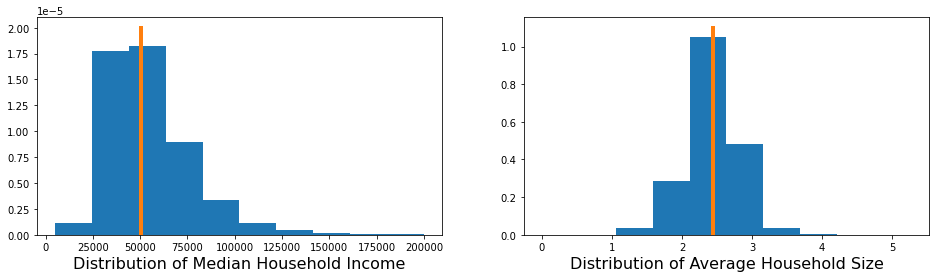

In [40]:
median_mhi = df["median_hhincome"].median()
median_ahs = df["ave_hh_sz"].median()

print("Median of median household income: {}".format(median_mhi))
print("Median of average household size: {}".format(median_ahs))

df["high_income"] = (df["median_hhincome"] >= median_mhi).astype(int)
df["large_family"] = (df["ave_hh_sz"] >= median_ahs).astype(int)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
axes[0].hist(df["median_hhincome"], density = True)
axes[0].plot([median_mhi] * 2, [0, 2e-5], linewidth = 4)
axes[0].set_xlabel("Distribution of Median Household Income", fontsize = 16)
axes[1].hist(df["ave_hh_sz"], density = True)
axes[1].plot([median_ahs] * 2, [0, 1.1], linewidth = 4)
axes[1].set_xlabel("Distribution of Average Household Size", fontsize = 16)

## Linear Regression

Please refer to the R Markdown document for this part. The linear regression part is a combination of reproducing results as well as trying to analyze some new insights.

## Testing

In [41]:
S = [
    Index([("treatment", 0)], [("treatment", 1)], [("female", 1)], "gave", "Female Response Rate"),
    Index([("treatment", 0)], [("treatment", 1)], [("female", 0)], "gave", "Male Response Rate"),
    Index([("treatment", 0)], [("treatment", 1)], [("high_income", 1)], "gave", "High Median Household Income Response Rate"),
    Index([("treatment", 0)], [("treatment", 1)], [("high_income", 0)], "gave", "Low Median Household income Response Rate"),
    Index([("treatment", 0)], [("treatment", 1)], [("large_family", 1)], "gave", "Large Household Size Response Rate"),
    Index([("treatment", 0)], [("treatment", 1)], [("large_family", 0)], "gave", "Small Household Size income Response Rate"),
    Index([("treatment", 0)], [("treatment", 1)], [("female", 1)], "amount", "Female Amount"),
    Index([("treatment", 0)], [("treatment", 1)], [("female", 0)], "amount", "Male Amount"),
    Index([("treatment", 0)], [("treatment", 1)], [("high_income", 1)], "amount", "High Median Household Income Amount"),
    Index([("treatment", 0)], [("treatment", 1)], [("high_income", 0)], "amount", "Low Median Household income Amount"),
    Index([("treatment", 0)], [("treatment", 1)], [("large_family", 1)], "amount", "Large Household Size Income Amount"),
    Index([("treatment", 0)], [("treatment", 1)], [("large_family", 0)], "amount", "Small Household Size income Amount"),
]

output = mht.test(df, S)
output.head(len(S))

Different treatments: 2, different subgroups : 6, different outcomes 2, compare pairs: 1


  0%|          | 0/3000 [00:00<?, ?it/s]

Check passed.


,Hypotheses,Absolute Difference,p (unadjusted),p (adjusted),p (Bonferroni),p (Holm's)
0,Female Response Rate,0.002926,0.262000,0.669000,1.000,1.000000
1,Male Response Rate,0.005133,0.000000,0.000000,0.000,0.000000
2,High Median Household Income Response Rate,0.001740,0.358667,0.672667,1.000,1.000000
3,Low Median Household income Response Rate,0.006448,0.000333,0.003667,0.004,0.003667
4,Large Household Size Response Rate,0.003454,0.070333,0.312333,0.844,0.492333
5,Small Household Size income Response Rate,0.004825,0.005667,0.042333,0.068,0.056667
6,Female Amount,0.051749,0.714667,0.714667,1.000,0.714667
7,Male Amount,0.203482,0.042333,0.238333,0.508,0.381000
8,High Median Household Income Amount,0.109186,0.405333,0.626000,1.000,0.810667
9,Low Median Household income Amount,0.195684,0.051000,0.263667,0.612,0.408000
